<a href="https://colab.research.google.com/github/rivkms/2021_sw_exam/blob/main/6%EC%A3%BC%EC%B0%A8_ML3_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8(%EC%88%98%EC%97%85%EC%9E%90%EB%A3%8C)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. 회귀 by 머신러닝

### 1-1. 회귀(Regression)

<img src="https://miro.medium.com/max/2560/1*F4JzgiTIUfFePLBj4A_JPw.jpeg" width=400px>

- $y = w_1x + w_0$ 
- 여러 개의 독립변수(x)와 한 개의 종속변수(y) 간의 상관관계를 모델링하는 것
- 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 $w_0$, $w_1$와 같은 **회귀 계수**(Regression Coefficients)를 찾아내는 것
- 회귀 유형 구분
  - 독립 변수 개수 : 1개인 경우 단일 회귀, 여러 개인 경우 다중 회귀
  - 회귀 계수의 결합 : 선형인 경우 선형 회귀, 비선형인 경우 비선형 회귀

### 1-2. 머신러닝으로 구현하는 선형 회귀

- 일반 선형 회귀 : 예측값과 실제값의 오차를 최소화할 수 있도록 회귀 계수를 최적화
- 릿지(Ridge)  
  - 선형 회귀에 L2 규제를 추가한 회귀 모델. 
  - L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
- 라쏘(Lasso) 
  - 선형 회귀에 L1 규제를 추가한 회귀 모델
  - L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 함
  - 피처 제거 기능
- 엘라스틱넷(ElasticNet) : L2, L1 규제를 함께 결합한 모델

--------
## 2. 회귀 모델

실제값과 예측값의 차이, 즉 오차를 최소화하는 것이 머신러닝 회귀 모델의 목표

### 2-1. 비용의 측정

- $MSE = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y_i})^2 $
  - 사이킷런의 LinearRegression 클래스는 제곱값을 최소화하는 알고리즘으로 구현되어 있다.
  - 미분이 가능하다. 


### 2-2. 경사하강법(Gradient Descent)
- $Cost(w_0, w_1) = \frac{1}{N}\sum_{i=1}^N (y_i - (w_0 + w_1 * x_i))^2 $


<img src="https://taewanmerepo.github.io/2018/08/mse/060.jpg" width=400px>

### 2-3. 회귀 모델 평가
|평가지표|사이킷런 API|설명|
|---|---|---|
|MAE|metrics.mean_absolute_error|Mean Absolute Error이며 오차(예측값-실제값)의 절대값의 평균|
|MSE|metrics.mean_squared_error|Mean Square Error이며 오차(실제값-예측값)를 제곱하여 평균을 계산한 지표|
|RMSE| 없음 | Root Mean Square Error이며 MSE에 루트를 씌워 오류의 제곱으로 인해 실제 오류 평균보다 커지는 특성을 보완한 방법|
| | |


----------------
## 3. 선형 회귀 문제 해결하기

### 3-1. 문제 정의(회귀 문제)

### 3-2. 데이터 수집(캐글 데이터셋 이용)

공유 자전거 수요 예측하기 대회
https://www.kaggle.com/c/bike-sharing-demand/data

In [ ]:
# 데이터셋 다운로드
from google.colab import files
files.upload()

Saving train (1).csv to train (1).csv


{'train (1).csv': b'datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count\n2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16\n2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40\n2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32\n2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13\n2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1\n2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.0032,0,1,1\n2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0,2,0,2\n2011-01-01 07:00:00,1,0,0,1,8.2,12.88,86,0,1,2,3\n2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0,1,7,8\n2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0,8,6,14\n2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36\n2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56\n2011-01-01 12:00:00,1,0,0,1,17.22,21.21,77,19.0012,29,55,84\n2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94\n2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106\n2011-01-01 15:00:00,1,0,0,2,18.04,21.97,

In [ ]:
import numpy as np
import pandas as pd
bike_df = pd.read_csv('/content/train (1).csv')
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 3-3. 데이터 전처리

In [ ]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df['datetime'].apply(pd.to_datetime)
# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [ ]:
# 필요없는 칼럼 삭제(count = casual + resistered 임)
# casual은 사전에 등록하지 않은 사용자의 자전거 대여 횟수, resistered는 사전에 등록한 사용자의 자전거 대여 횟수
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)


In [ ]:
bike_df.tail(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22
10885,4,0,1,1,13.12,16.665,66,8.9981,88,2012,12,19,23


### 3-4. 모델 학습

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_target =bike_df['count']
x_feature = bike_df.drop(['count'],axis=1,inplace=False)

x_train, x_test, y_train, y_test= train_test_split(x_feature, y_target,test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)
pred = lr_reg.predict(x_test)

### 3-5. 모델 예측 및 평가

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# MSE, RMSE, MAE 계산

def model_evaluate(y, pred):
    MSE_val = mean_squared_error(y, pred)
    RMSE_val = np.sqrt(MSE_val)
    MAE_val = mean_absolute_error(y, pred)

    print('MSE: {0:.3f}, RMSE: {1:.3F}, MAE:{2:.3F}'.format(MSE_val,RMSE_val, MAE_val))

model_evaluate(y_test,pred)

MSE: 19852.694, RMSE: 140.900, MAE:105.924


### 3-6. 모델 개선(스케일링)
#### 선형 회귀 모델을 위한 스케일링
선형회귀모델은 x, y 모두 분포가 정규 분포 형태일 때 정확도가 높아진다. 따라서 선형 회귀 모델을 적용하기 전 데이터에 대한 스케일링을 수행하는 것이 일반적이다. 그러나 스케일링이 예측 성능의 향상을 무조건 보장하는 것은 아니다. 

#### 스케일링 방법
1. StandardScaler 클래스를 이용해 평균 0, 분산 1인 정규분포로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값 0, 최댓값 1인 값으로 정규화
2. log 변환으로 정규분포에 가깝게 변경(실제로 많이 사용됨)

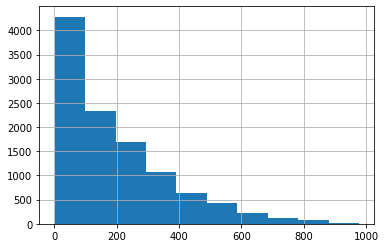

In [ ]:
# 타겟 데이터의 분포 확인
y_target.hist()

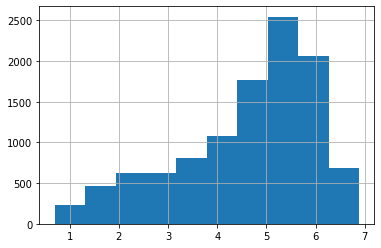

In [ ]:
# 타겟을 정규 분포와 유사한 분포로 바꾸기 위하여 로그 변환
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [ ]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_target_log = np.log1p(y_target)
# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
x_train,x_test,y_train,y_test = train_test_split(x_feature,y_target_log,test_size=0.3,random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

In [ ]:
# 개선된 모델 평가

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

model_evaluate(y_test_exp,pred_exp)




MSE: 26436.896, RMSE: 162.594, MAE:109.286


### 3-7. 모델 다시 개선(원핫 인코딩)


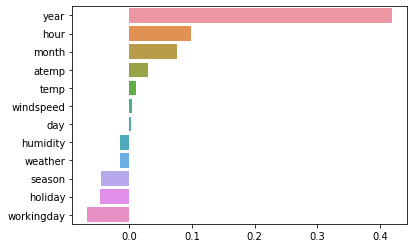

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 학습된 모델의 회귀 계수 확인하기
coef = pd.Series(lr_reg.coef_,index=x_feature.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

- 문제 진단 : 

  - year에 의해 자전거 대여 횟수가 크게 영향을 받는 다는 것이 이상함
  - year는 hour, month, temp에 비해 값이 매우 큰 숫자로 이루어져 있음

#### One-Hot Encoding
  - 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식이다.
  - 예로 '상품' 피처의 데이터가 핸드폰, 컴퓨터, 태블릿으로 되어 있으면 '상품_핸드폰' 피처가 생기면서 핸드폰에만 1, 나머지 상품에는 0이 저장되는 방식이다.
  - '상품' 피처가 '상품_핸드폰', '상품_컴퓨터', '상품_태블릿' 식으로 늘어난다.


In [ ]:
# 숫자형 값에 크게 영향을 받지 않도록 피처를 One Hot Encoding
# 'year','month','hour','season','weather' feature를 One Hot Encoding
x_feature_one = pd.get_dummies(x_feature, columns=['year','month','hour','holiday','workingday','season','weather'])
x_feature_one.head()

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_0,holiday_1,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0


In [ ]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
x_train,x_test,y_train,y_test = train_test_split(x_feature_one,y_target_log,test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

In [ ]:
# 개선된 모델 평가

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

model_evaluate(y_test_exp, pred_exp)



MSE: 9502.940, RMSE: 97.483, MAE:63.106


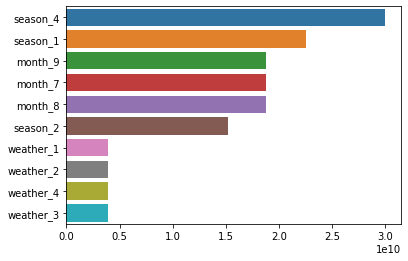

In [ ]:
# 학습된 모델의 회귀 계수 확인하기
coef = pd.Series(lr_reg.coef_ , index=x_feature_one.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y=coef_sort.index)